In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the data
df=pd.read_csv('kc_house_data.csv')

In [3]:
# first five rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns # check the columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# based on yr_built we can calculate the age of the building 
# the nearest year from the date column is 2015
df['building_age']=[2015-i for i in df.yr_built]

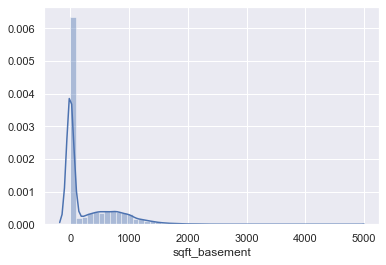

In [6]:
# basement distribution
sns.distplot(df.sqft_basement)

In [7]:
# create dummy variavle for sqft_basement column
dummy_basement=[]
for i in df.sqft_basement:
    if i!=0:
        dummy_basement.append(1)
    else:
        dummy_basement.append(i)
# if a house has a basement then the value will be 1 else the value is 0
df['dummy_basement']= dummy_basement    
df['dummy_basement'].value_counts()

0    13126
1     8487
Name: dummy_basement, dtype: int64

In [8]:
# zipcode is also important because the house location also affect housing price
# #!pip install uszipcode #install the uszipcode first 
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)
cities=[]
for zipcode in df.zipcode:
    city=search.by_zipcode("{}".format(zipcode)).major_city
    cities.append(city)

In [9]:
#based on the zipcode, we obtianed the column of cities
df['city']=cities

In [10]:
#select features
features=['price', 'bedrooms', 'sqft_living','dummy_basement',
          'condition', 'grade', 'building_age','city']
len(features)

8

# Distribution of features

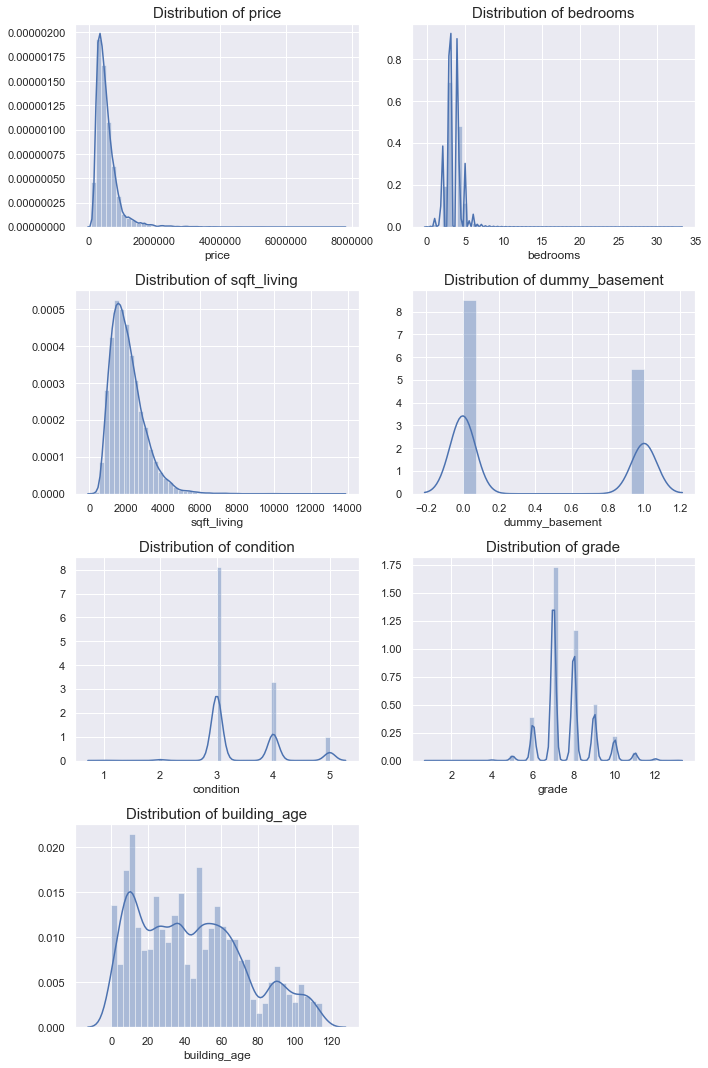

In [11]:
# plot features distribution 
plt.figure(figsize=(10,15))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.distplot(df[features[i]])
    plt.title("Distribution of {}".format(features[i]),fontsize=15)
    plt.tight_layout() 

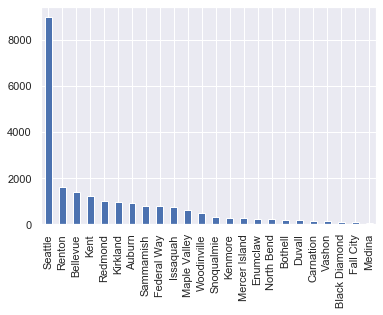

In [12]:
# distribution of city column
df.city.value_counts().plot(kind='bar')

# Outliers removal

In [13]:
# create a function to remove outliers 
def outlier_removal(df,col,quantile):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title('Distribution Before Outlier Removal')
    plt.subplot(1,2,2)
    df_new=df[df[col]<df[col].quantile(quantile)]
    sns.distplot(df_new[col])
    plt.title('Distribution After Outlier Removal')

    plt.tight_layout()
    return df_new

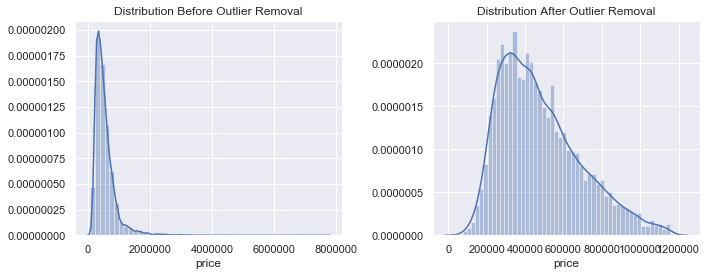

In [14]:
# price 
df_1=outlier_removal(df,'price',0.95)

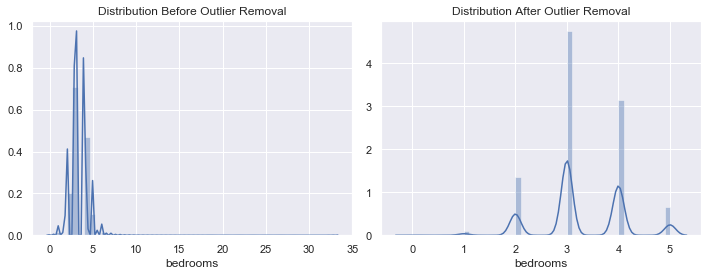

In [15]:
# Bedroom Numbers
df_2=outlier_removal(df_1,'bedrooms',0.99)

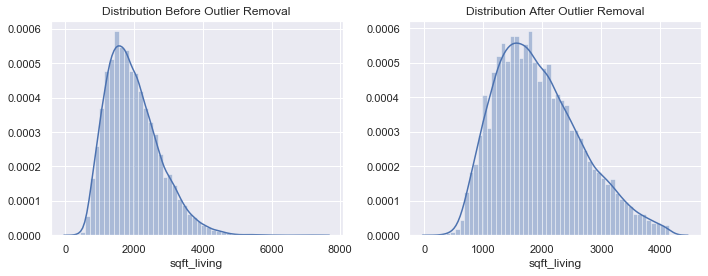

In [16]:
# sqft_living
df_3=outlier_removal(df_2,'sqft_living',0.99)

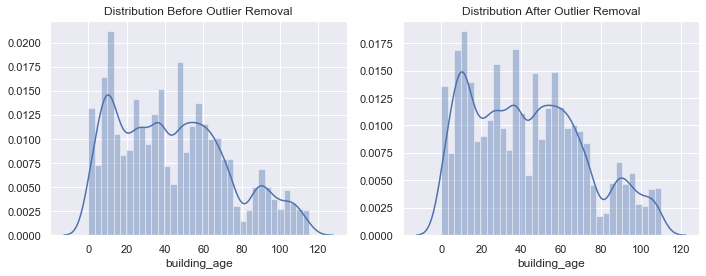

In [17]:
# sqft_living
df_or=outlier_removal(df_3,'building_age',0.99)

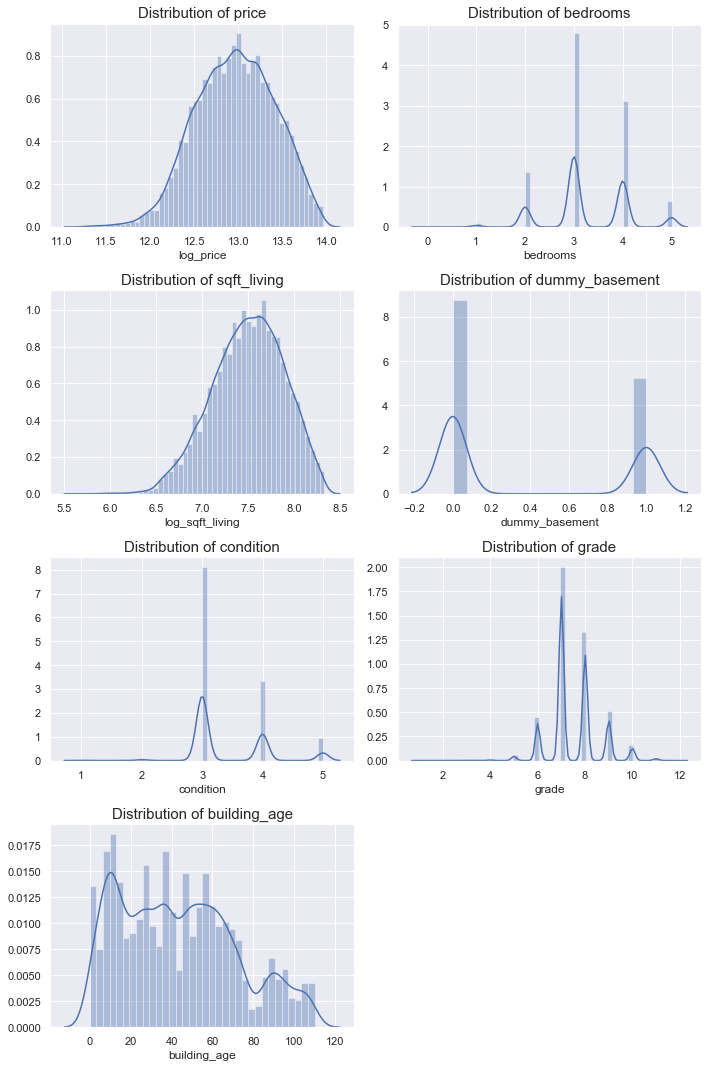

In [18]:
# check the distribution again after data transformation
import warnings
warnings.filterwarnings("ignore")
# create new columns - log_sqrt_living and log_price
df_or['log_sqft_living']=np.log(df_or.sqft_living)
df_or['log_price']=np.log(df_or.price)

feature_list=['log_price', 'bedrooms', 'log_sqft_living', 'dummy_basement', 'condition', 'grade', 'building_age', 'city']

# plot features distribution 
plt.figure(figsize=(10,15))
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.distplot(df_or[feature_list[i]])
    plt.title("Distribution of {}".format(features[i]),fontsize=15)
    plt.tight_layout()

# Linearity and Homoskedasticity

In [19]:
# a function to generate scatter plots - before transformation and after transformation
def scatter_plot(x,y,t_x,t_y,title): 
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(x,y)
    plt.title('{} - Linearity Before Transformation'.format(title))
    plt.subplot(1,2,2)
    plt.scatter(t_x,t_y)
    plt.title('{} - Linearity After Transformation'.format(title))
    plt.tight_layout()

## Price VS Bedrooms

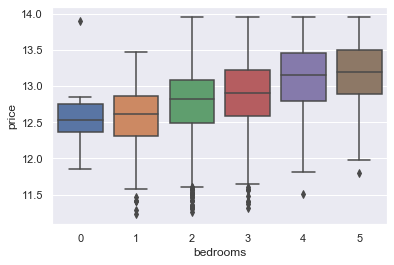

In [20]:
sns.boxplot(df_or['bedrooms'], y=np.log(df_or['price']))

## Price VS sqft_living

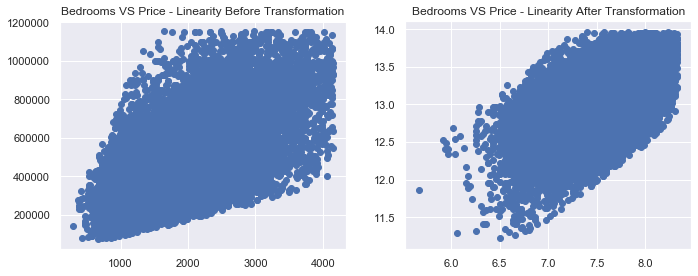

In [21]:
scatter_plot(df_or['sqft_living'],df_or['price'],
             np.log(df_or['sqft_living']),np.log(df_or['price']),
            "Bedrooms VS Price")

## basement VS price


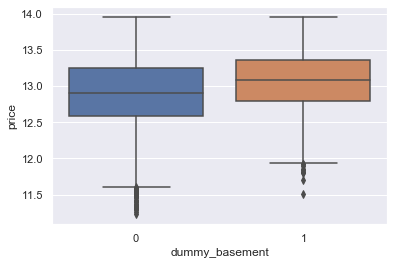

In [23]:
# box plot the  price mean of the houses without basements is smaller than the price mean of
# these houses with basements 
sns.boxplot(df_or['dummy_basement'], y=np.log(df_or['price']))

## condition vs price 

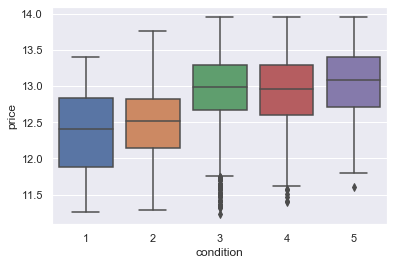

In [24]:
# we can see that if the scores of the condition increases, 
#the mean of the price also increases.
sns.boxplot(df_or['condition'], y=np.log(df_or['price']))

## Grade vs Price


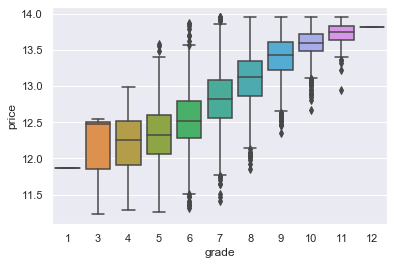

In [25]:
sns.boxplot(df_or['grade'], y=np.log(df_or['price']))

## building_age VS price

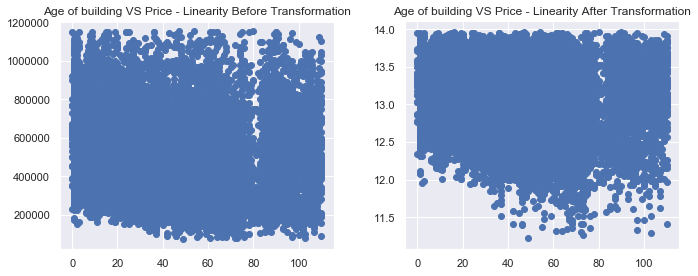

In [26]:
 scatter_plot(df_or['building_age'],df_or['price'],
             (df_or['building_age']),np.log(df_or['price']),
            "Age of building VS Price")

## cities vs price 

In [27]:
geo_df=df_or[['price','city','lat','long']].groupby(['city'])['price','lat','long'].mean().reset_index()
geo_df.head()

,city,price,lat,long
0,Auburn,287115.150224,47.306281,-122.219093
1,Bellevue,676262.359852,47.592499,-122.150343
2,Black Diamond,421316.842105,47.333740,-121.998989
3,Bothell,483996.751323,47.755349,-122.200862
4,Carnation,422241.850000,47.672539,-121.846283


In [28]:
# import geo pandas
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [32]:
# read the shape data 
shp_df=gpd.read_file('kc-shp')

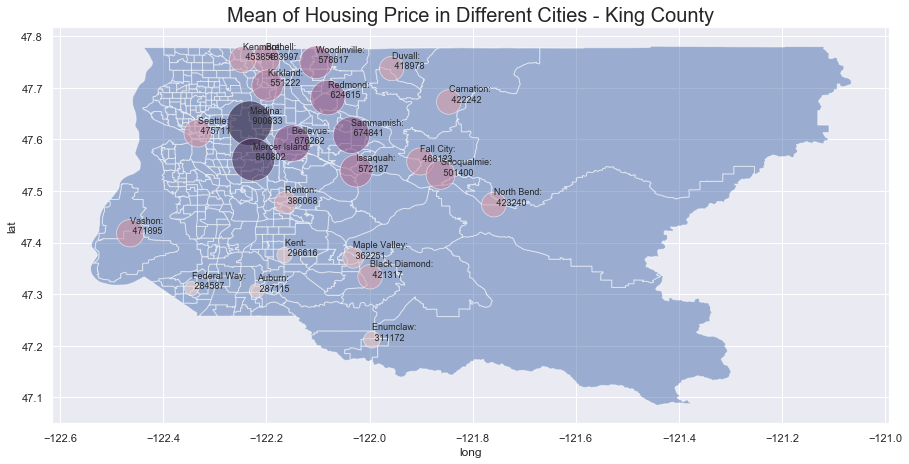

In [33]:
shp_df.plot(figsize=(15, 10),alpha=0.5)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(geo_df.long,geo_df.lat,alpha=0.6,
                size=geo_df.price,hue=geo_df.price
               ,sizes=(200, 2000),
                    legend=None )

for i in range(len(geo_df)):
    plt.text(geo_df.long[i],geo_df.lat[i],'{}: \n {}'.format(geo_df.city[i],round(geo_df.price[i])),fontsize=9)
    
plt.title('Mean of Housing Price in Different Cities - King County',fontsize=20)
plt.show()

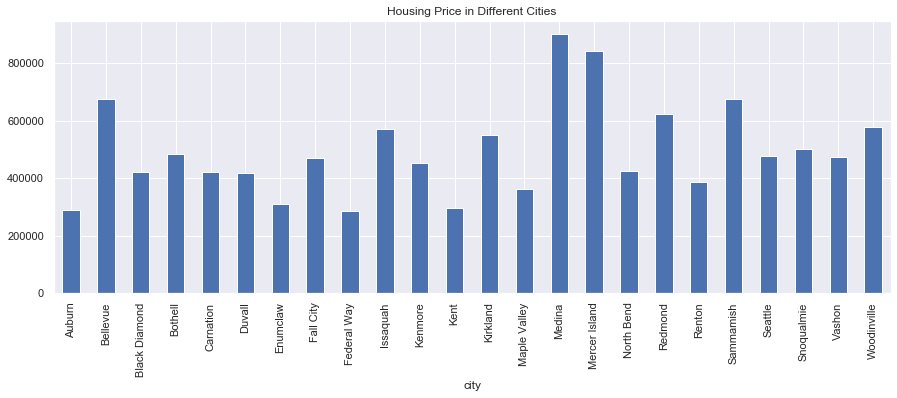

In [34]:
geo_df.groupby('city')['price'].mean().plot(kind='bar',
                                            title='Housing Price in Different Cities',
                                           figsize=(15,5))

# Feature Selection


In [36]:
# create dummies for city column
dummies=pd.get_dummies(df_or.city,drop_first=True)
new_df=df_or[[ 'log_price','bedrooms', 'log_sqft_living', 'dummy_basement', 'condition', 'grade', 'building_age']].merge(dummies,left_index=True,right_index=True)


In [37]:
# declare independent and dependent variables
inputs=new_df.drop(columns='log_price')
target=new_df.log_price

# Train test split

In [47]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)



Training set - Features:  (15863, 29) Target:  (15863,)
Test set- Features:  (3966, 29) Target:  (3966,)


# Feature Selection

In [48]:
x_train =pd.DataFrame(data=x_train, columns=inputs.columns)
x_test =pd.DataFrame(data=x_test, columns=inputs.columns)

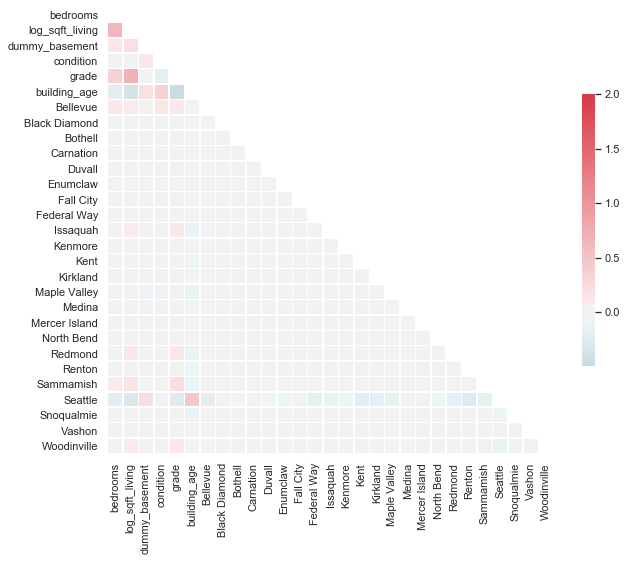

In [50]:
sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

# Linear Regresson

In [39]:
# import package
from sklearn.linear_model import LinearRegression

In [53]:
# fit the model 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# r_squared
reg.score(x_train,y_train)

0.7018984058392903

In [55]:
# coefficient
reg.coef_

array([-3.41400668e-02,  4.88665050e-01,  8.71493696e-04,  4.81736465e-02,
        1.69329596e-01,  2.30019732e-03,  6.51634616e-01,  2.86509029e-01,
        4.18984126e-01,  3.58595820e-01,  3.56854413e-01,  1.08297704e-01,
        4.62606508e-01, -3.58166414e-02,  5.18695507e-01,  3.96747248e-01,
        4.72791847e-02,  5.90343135e-01,  1.94191287e-01,  1.21375565e+00,
        8.05398136e-01,  3.56224188e-01,  5.99044356e-01,  2.35043156e-01,
        5.30093552e-01,  4.95811491e-01,  4.50552774e-01,  4.94671307e-01,
        4.56383120e-01])

In [56]:
#intercept
reg.intercept_

7.4732804436486555

In [60]:
# since we transformed data then let us transfom it back 
# prediction
train_prediction=reg.predict(x_train)
test_prediction=reg.predict(x_test)


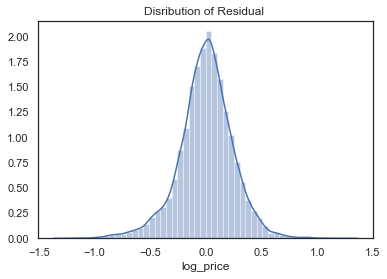

In [62]:
# plot the residual of predicted values and Actual values - x_train
sns.distplot(y_train-train_prediction)
plt.title('Disribution of Residual - x_train')
plt.show()

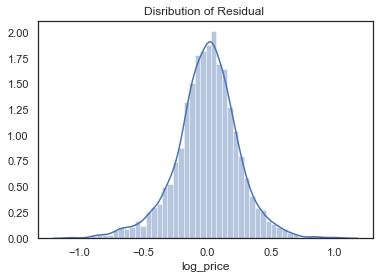

In [63]:
# plot the residual ofpredicted values and Actual values - x_test
sns.distplot(y_test-test_prediction)
plt.title('Disribution of Residual - x_test')
plt.show()

In [59]:
# summary of all coefficients
reg_summary = pd.DataFrame(x_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,bedrooms,-0.034140
1,log_sqft_living,0.488665
2,dummy_basement,0.000871
3,condition,0.048174
4,grade,0.169330
5,building_age,0.002300
6,Bellevue,0.651635
7,Black Diamond,0.286509
8,Bothell,0.418984
9,Carnation,0.358596


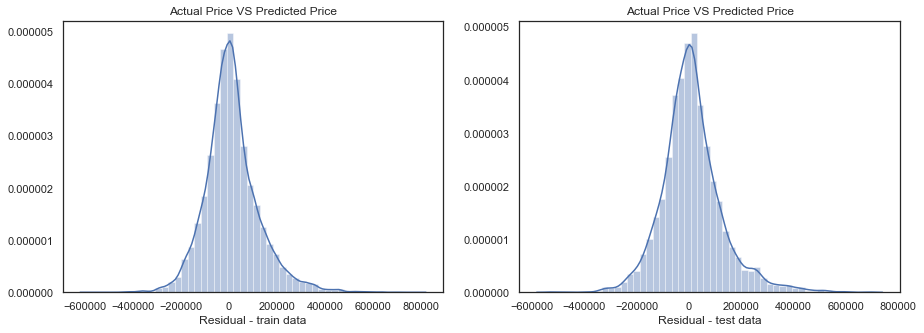

In [89]:
# Actual vs prediction (reverse the log using np.exp) - train data 
actual=np.exp(y_train)
predicted_values=np.exp(train_prediction)

# Actual vs prediction (reverse the log using np.exp) - test data 
test_actual=np.exp(y_test)
test_predicted_values=np.exp(test_prediction)

# let us plot!
plt.figure(figsize=(15,5))
# plot the residual distribution again 
plt.subplot(1,2,1)
sns.distplot(actual-predicted_values)
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Residual - train data")
# plot the residual distribution again 

plt.subplot(1,2,2)
sns.distplot(test_actual-test_predicted_values)
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Residual - test data")
plt.show()

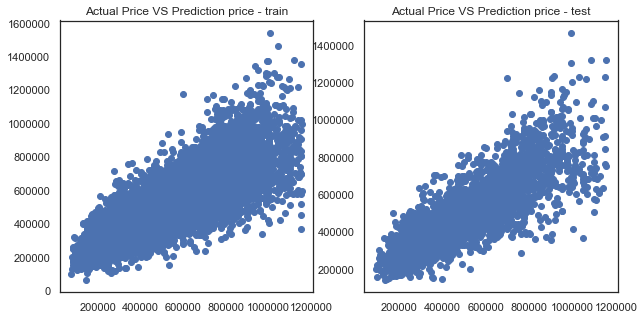

In [86]:
# take a look at the y_train and train_prediction, y_test and test_prediction
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(np.exp(y_train) ,np.exp(train_prediction))
plt.title('Actual Price VS Prediction price - train')
plt.subplot(1,2,2)
plt.scatter(np.exp(y_test) ,np.exp(test_prediction))
plt.title('Actual Price VS Prediction price - test')
plt.show()